Installations

In [ ]:
!pip install -U sentence-transformers
!pip install -U transformers
!pip install --upgrade openai
!pip install scikit-learn-extra
!pip install datasets
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=75a83da4524a89259cec2b967625feabf4e85f4d3ecaf343c6b3ce5aca91add2
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.o

Imports

In [ ]:
import pandas as pd
import time
from sklearn.cluster import OPTICS
import seaborn as sns
import hdbscan
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
import re
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline, T5Tokenizer, T5ForConditionalGeneration, T5Config
from transformers import AutoTokenizer, AutoModel, GPTNeoForCausalLM, AutoModelForCausalLM
import numpy
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import ast
from transformers import AutoTokenizer, AutoModel, GPTNeoForCausalLM
import warnings
from sklearn.neighbors import NearestNeighbors
import os
from sklearn.cluster import MeanShift
import numpy as np
from sklearn.decomposition import PCA
from datasets import load_dataset
import openai
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from transformers import GPT2TokenizerFast
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import euclidean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from DBCV import DBCV

# **Datasets**

**MultiArith**

In [ ]:
import ast
multiarith_test_df = pd.read_json('/content/MultiArith.json')
multiarith_test_df = multiarith_test_df.drop(columns= ['iIndex','lAlignments'], axis=1)
multiarith_test_df.rename(columns={'lSolutions': 'label', 'lEquations': 'answer','sQuestion' : 'question'}, inplace=True)
def pre_process(row):
  return row[0]
multiarith_test_df['label'] = multiarith_test_df['label'].apply(pre_process)
multiarith_test_df['answer'] = multiarith_test_df['answer'].apply(pre_process)
print("The number of data samples in the test set: " + str(multiarith_test_df.shape[0]))
multiarith_test_df.head(3)

The number of data samples in the test set: 600


,answer,label,question
0,X=((32.0+42.0)-35.0),39.0,For Halloween Debby and her sister combined t...
1,X=((13.0+5.0)-10.0),8.0,A pet store had 13 siamese cats and 5 house c...
2,X=((2.0+2.0)-2.0),2.0,Luke was trying to expand his game collection...


**AddSub**

In [ ]:
import ast
addSub_test_df = pd.read_json('/content/AddSub.json')
addSub_test_df = addSub_test_df.drop(columns= ['iIndex'], axis=1)
addSub_test_df.rename(columns={'lSolutions': 'label', 'lEquations': 'answer','sQuestion' : 'question'}, inplace=True)
def pre_process(row):
  return row[0]
addSub_test_df['label'] = addSub_test_df['label'].apply(pre_process)
addSub_test_df['answer'] = addSub_test_df['answer'].apply(pre_process)
print("The number of data samples in the test set: " + str(addSub_test_df.shape[0]))
addSub_test_df.head(3)

The number of data samples in the test set: 395


,answer,label,question
0,X = 70 - 27,43,Joan found 70 seashells on the beach . she gav...
1,X = 54 - 28,26,There were 28 bales of hay in the barn . Tim s...
2,X = 8 - 2,6,Mary is baking a cake . The recipe wants 8 cup...


# **Sentence-BERT for extracting embeddings.**

In [ ]:
#Model for generating the embeddings
MODEL_NAME = "all-MiniLM-L6-v2"

In [ ]:
#change the dataset corresponding to the dataset you are working with
dataset_test_df = multiarith_test_df
similarity_model = SentenceTransformer(MODEL_NAME)
question_embeddings = similarity_model.encode(dataset_test_df["question"].tolist())

In [ ]:
print(f"The length of the contextualize embeddings vectors for the questions is = {question_embeddings[0].shape[0]}")

The length of the contextualize embeddings vectors for the questions is = 384


In [ ]:
dataset_test_df['embedding'] = question_embeddings.tolist()
dataset_test_df.head()

,answer,label,question,embedding
0,X=((32.0+42.0)-35.0),39.0,For Halloween Debby and her sister combined t...,"[0.06369412690401077, 0.06417844444513321, -0...."
1,X=((13.0+5.0)-10.0),8.0,A pet store had 13 siamese cats and 5 house c...,"[0.07688987255096436, 0.08878012746572495, 0.0..."
2,X=((2.0+2.0)-2.0),2.0,Luke was trying to expand his game collection...,"[0.04334225878119469, -0.023824280127882957, 0..."
3,X=((42.0+7.0)-9.0),40.0,The school cafeteria ordered 42 red apples an...,"[0.06245764344930649, 0.0662773996591568, 0.03..."
4,X=((36.0+37.0)-70.0),3.0,Lana picked 36 tulips and 37 roses to make fl...,"[0.07969094067811966, -0.006579517386853695, -..."


# **CLUSTERING PART**

**Helpers functions**

In [ ]:
def euclidean_dist(points_serie,centeroid):
  points_list = points_serie.tolist()
  points_list.sort(key = lambda p: math.dist(p, centeroid))
  return points_list

In [ ]:
def linearize_data(labels, clusters_list):
  X= []
  y = []
  for i in labels:
    if i == -1:
      continue
    for j in clusters_list[i]['embedding']:
      X.append(j)
      y.append(i)
  return X,y

In [ ]:
multiarith_cluster_score= {}
addsub_cluster_score= {}

**PCA for plotting**

In [ ]:
pca = PCA(2)
embeddings_in2d = pca.fit_transform(dataset_test_df['embedding'].tolist())

**SVD for Decompostion**

In [ ]:
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
transformed_emb = svd.fit_transform(dataset_test_df['embedding'].tolist())
#amount of the variance explained
print(svd.explained_variance_ratio_.sum())

0.9976343742807315


**DBSCAN**

In [ ]:
#KNN distance
MIN_points = 10
neigh = NearestNeighbors(n_neighbors=MIN_points)
def nearest_neighbor(dataset):
  nbrs = neigh.fit(dataset)
  distances, indices = nbrs.kneighbors(dataset)
  distances = np.sort(distances, axis=0)[::-1]
  distances = distances[:,1]
  plt.figure(figsize=(10,5))
  plt.plot(distances)
  plt.title('K-distance Graph',fontsize=15)
  plt.xlabel('Data Points sorted by distance',fontsize=14)
  plt.ylabel('Epsilon',fontsize=14)
  plt.show()

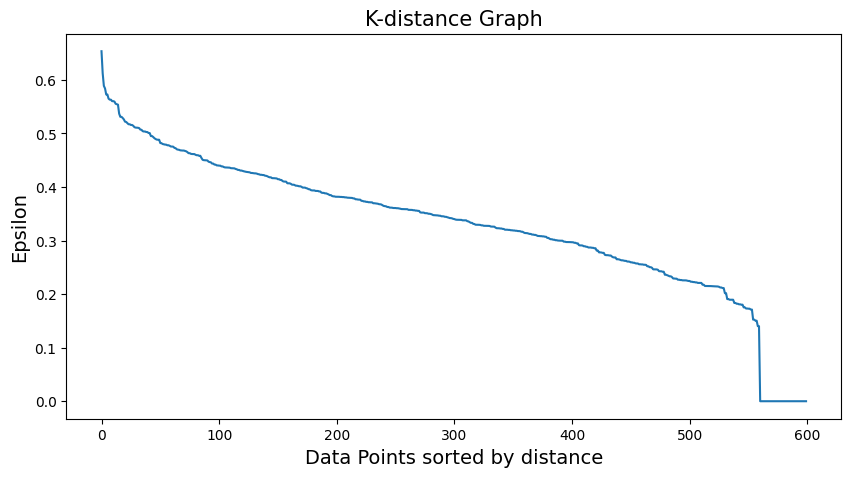

In [ ]:
nearest_neighbor(transformed_emb)

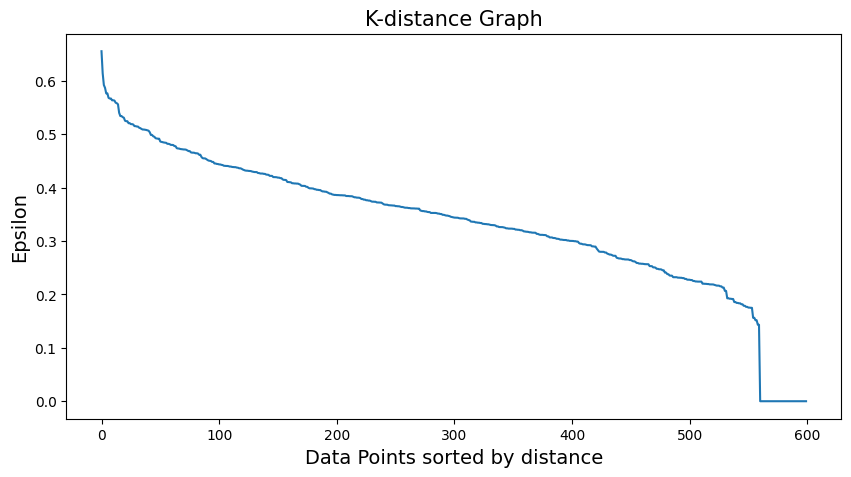

In [ ]:
nearest_neighbor(dataset_test_df['embedding'].tolist())

In [ ]:
transformed_clustering = DBSCAN(eps=0.8, min_samples=MIN_points).fit(transformed_emb)
clustering = DBSCAN(eps=0.8, min_samples=MIN_points).fit(dataset_test_df['embedding'].tolist())
labels = clustering.labels_
transformed_labels = transformed_clustering.labels_

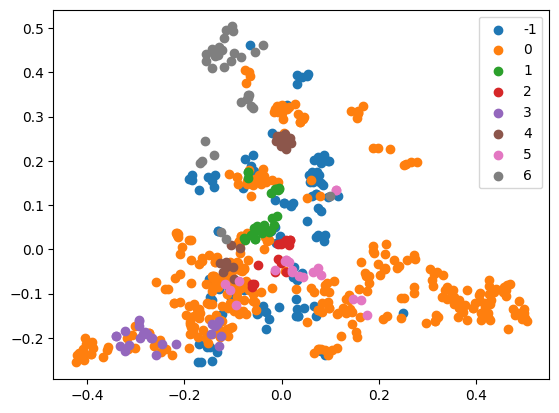

In [ ]:
#ploting DBSCAN results
#Getting unique labels
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

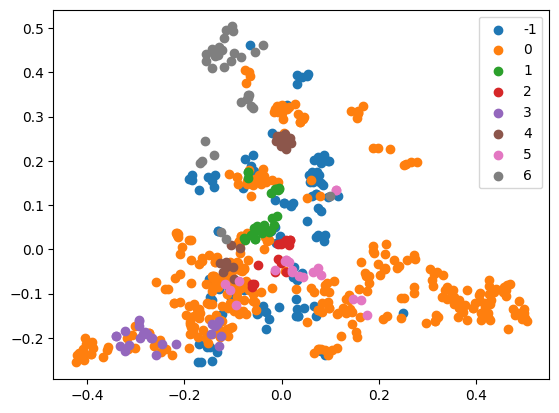

In [ ]:
u_labels = np.unique(transformed_labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for DBSCAN
clusters_list = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  if i == -1: #ignore the noise cluster
    continue
  clusters_list.append(cluster_df)
neigh = NearestNeighbors(n_neighbors=MIN_points+1)
for i in range(len(clusters_list)):
  nbrs = neigh.fit(clusters_list[i]['embedding'].tolist())
  distances, indices = nbrs.kneighbors(clusters_list[i]['embedding'].tolist())
  dists = []
  for dist in distances:
    dists.append(np.mean(dist))
  clusters_list[i]['distances'] = dists
  clusters_list[i].sort_values('distances',ascending=True, inplace=True)

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
DBSCAN_addsub_score = silhouette_score(numpy.array(X), numpy.array(y))
#addsub_cluster_score["DBSCSN_DBCV"]= DBSCAN_addsub_score
DBSCAN_addsub_score

0.21635402388451153

**KMEDOIDS**

In [ ]:
#kmedoid with PAM
kmedoids = KMedoids(n_clusters=8).fit(dataset_test_df['embedding'].tolist())
transformed_kmedoids = KMedoids(n_clusters=8).fit(transformed_emb)
labels = kmedoids.labels_
transformed_labels = transformed_kmedoids.labels_
centers = kmedoids.cluster_centers_
transformed_centers = transformed_kmedoids.cluster_centers_

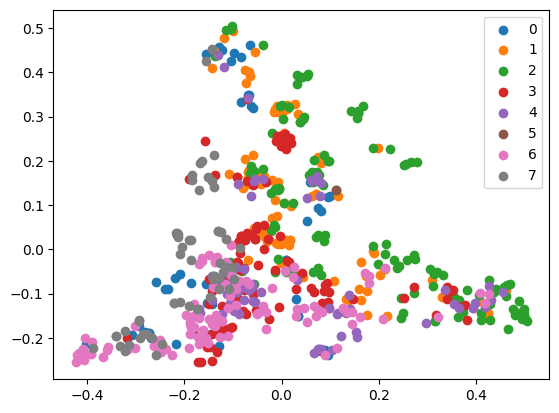

In [ ]:
#Getting unique labels
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

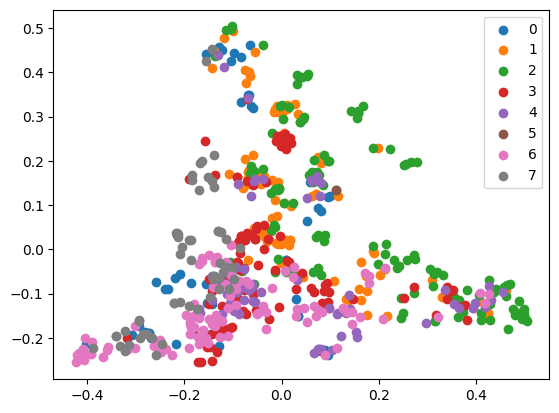

In [ ]:
u_labels = np.unique(transformed_labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for KMEDOID
clusters_list = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  clusters_list.append(cluster_df)
for i in range(len(clusters_list)):
  clusters_list[i].sort_values('embedding',ascending=True, inplace=True,key = lambda p: euclidean_dist(p, centers[i]))

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
Kmedoid_addsub_score= DBCV(np.array(X), np.array(y), dist_function=euclidean)
#addsub_cluster_score["Kmedoid_silhouette"]= Kmedoid_addsub_score
Kmedoid_addsub_score

**Agglomerative**

ward

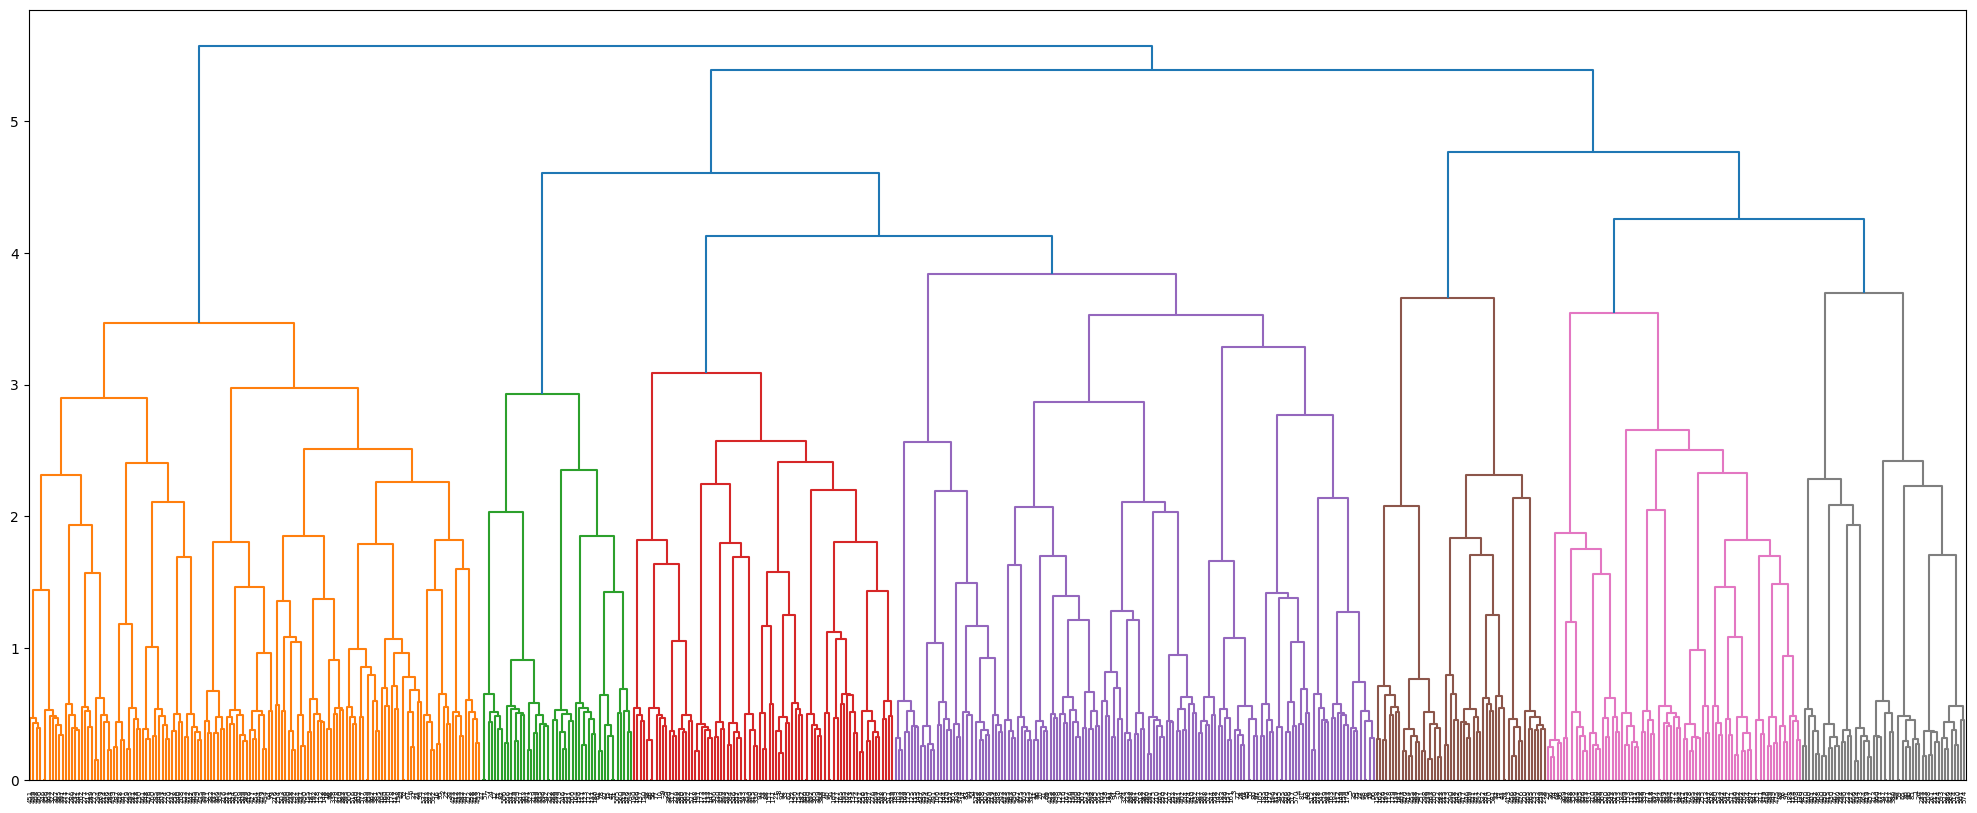

In [ ]:
#ward linkage
Z = linkage(dataset_test_df['embedding'].tolist(), 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Single

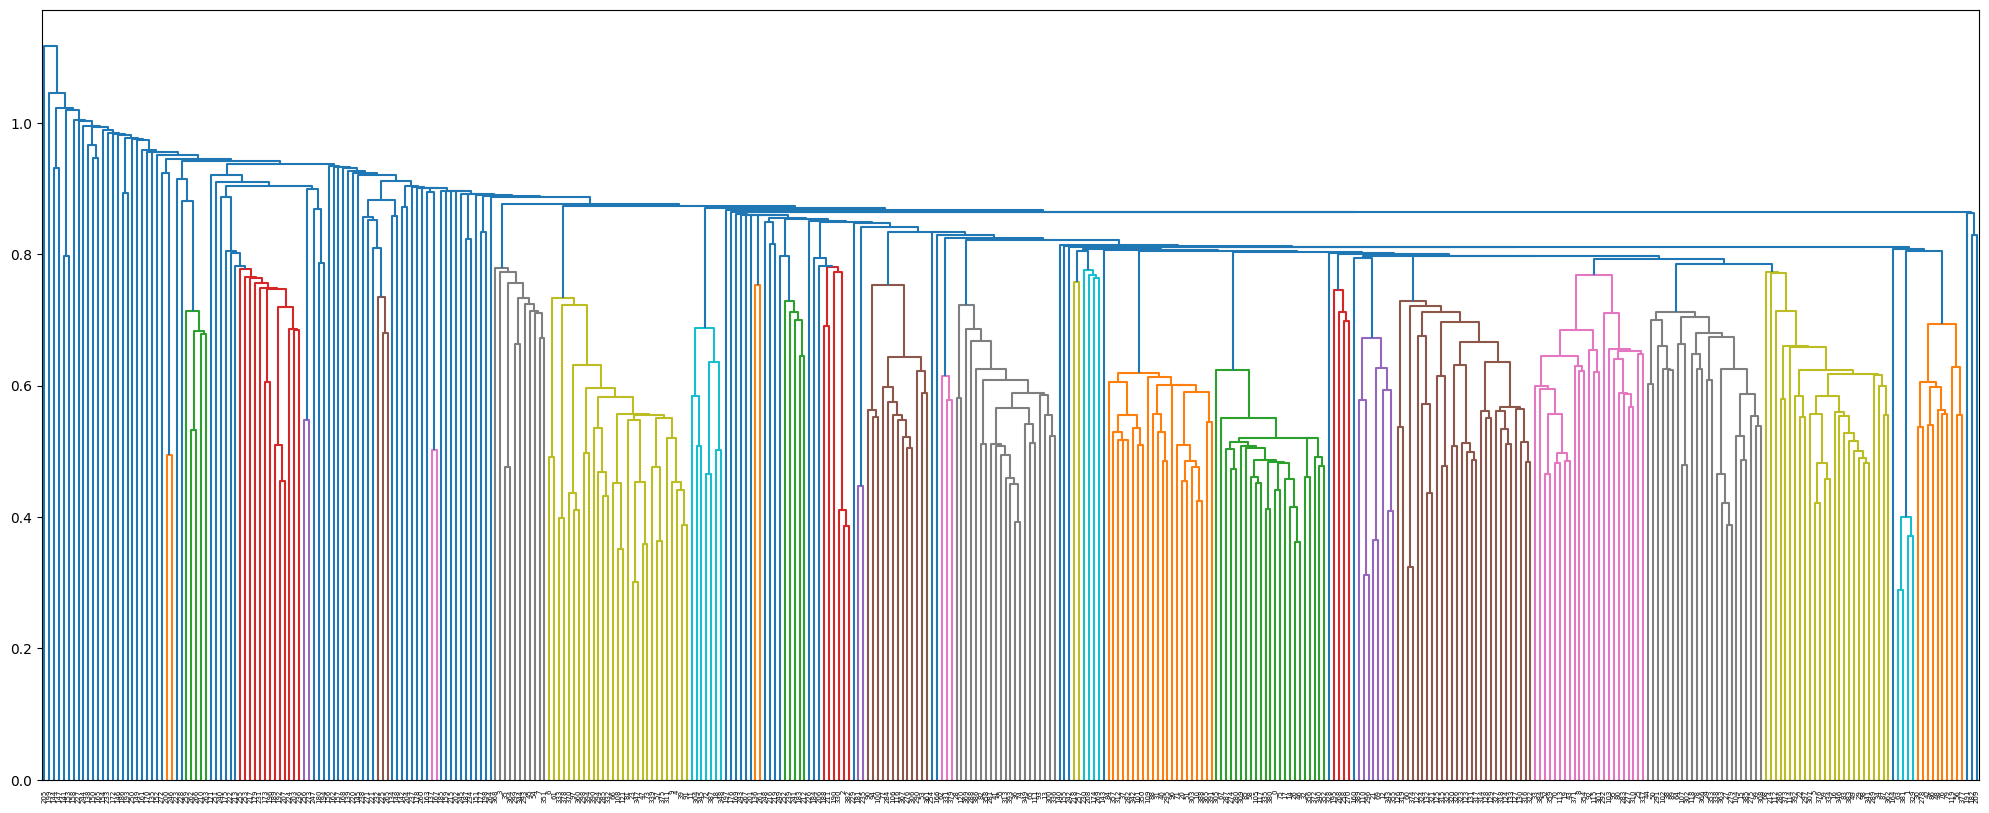

In [ ]:
#single linkage
Z = linkage(dataset_test_df['embedding'].tolist(), 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Complete

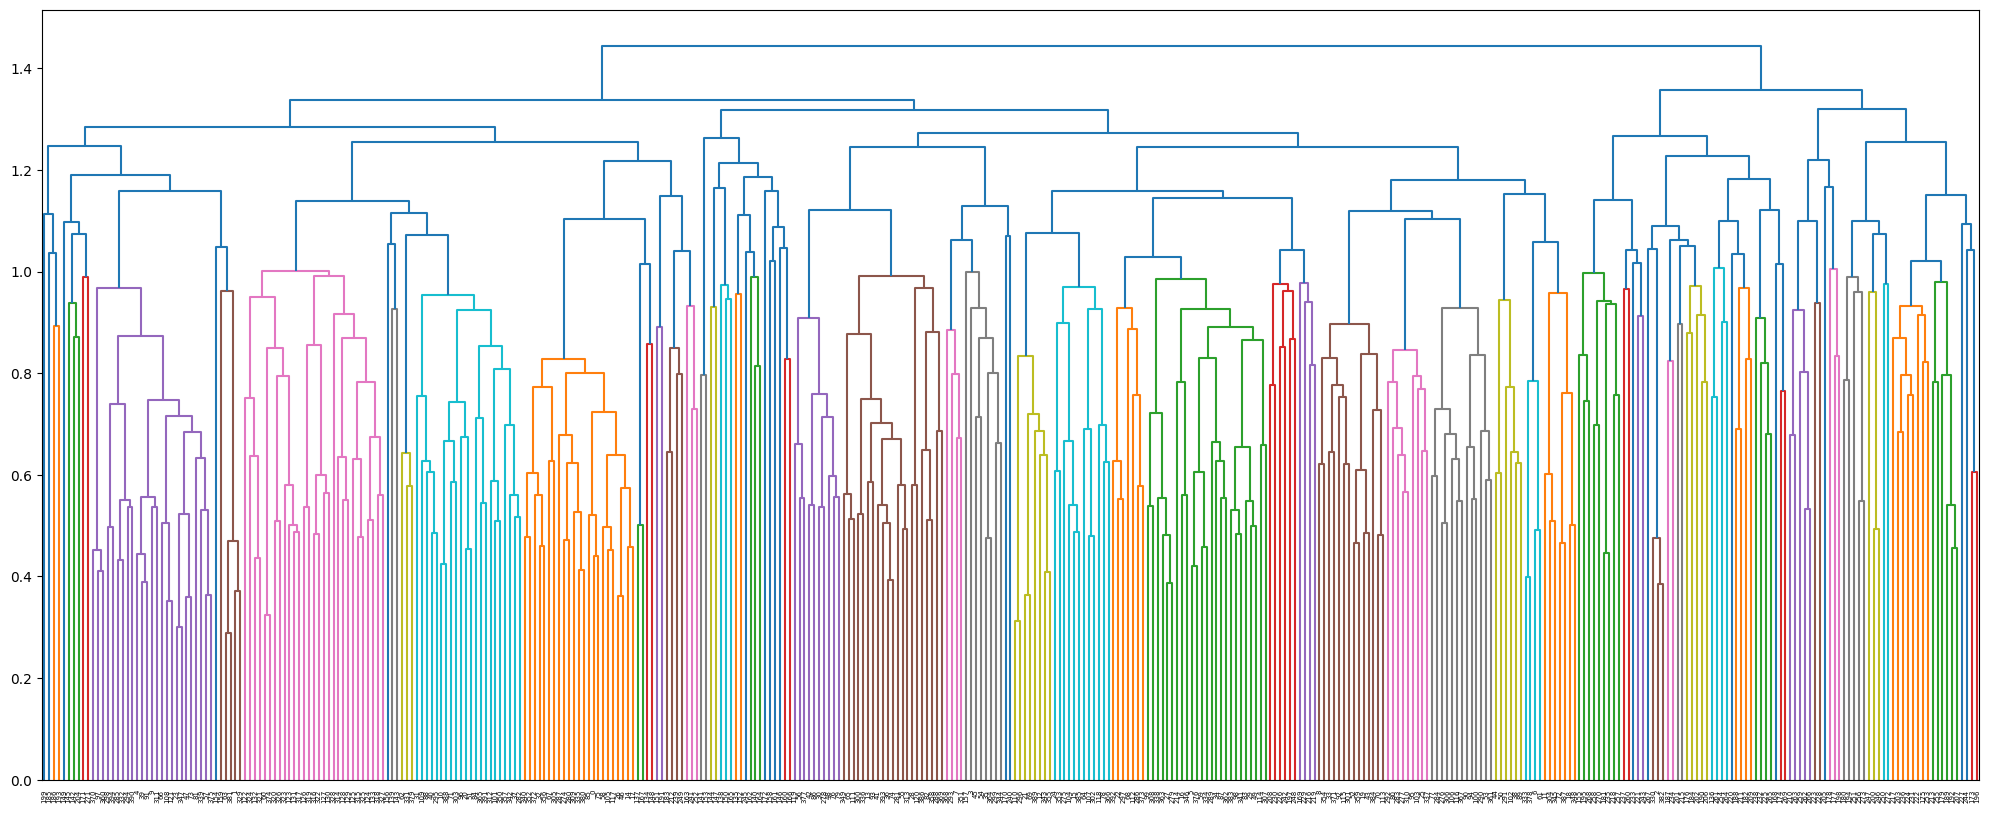

In [ ]:
#complete linkage
Z = linkage(dataset_test_df['embedding'].tolist(), 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

average

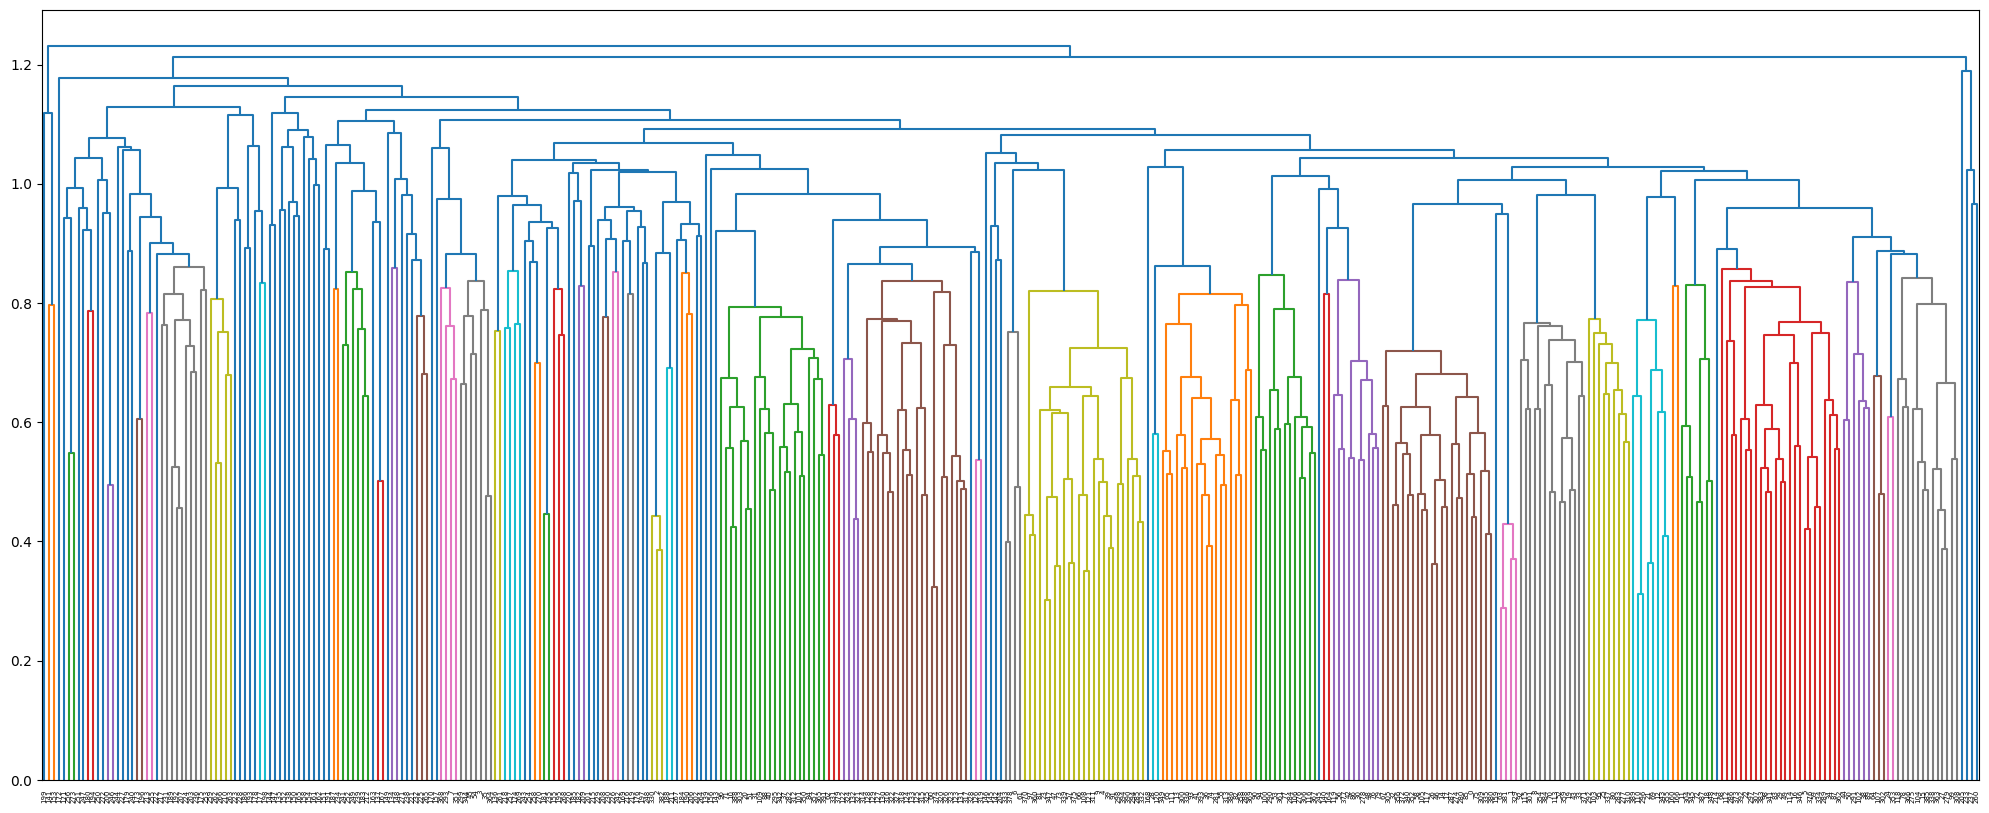

In [ ]:
#average linkage
Z = linkage(dataset_test_df['embedding'].tolist(), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

After choosing the linkage run below

In [ ]:
link = "ward"
clustering = AgglomerativeClustering(n_clusters = 4,linkage = link).fit(dataset_test_df['embedding'].tolist())
labels = clustering.labels_

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for agglomerative
from statistics import mean
clusters_list = []
centers = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  column_average = [float(sum(col))/len(col) for col in zip(*cluster_df["embedding"].tolist())]
  centers.append(column_average)
  clusters_list.append(cluster_df)
for i in range(len(clusters_list)):
  clusters_list[i].sort_values('embedding',ascending=True, inplace=True,key = lambda p: euclidean_dist(p, centers[i]))

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
award_addsub_score= DBCV(np.array(X), np.array(y))
#addsub_cluster_score["award_silhouette"]= award_addsub_score
award_addsub_score

**HDBSCAN**

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30,min_samples = 5, gen_min_span_tree=True)
clusterer.fit(dataset_test_df['embedding'].tolist())
labels = clusterer.labels_

<Axes: >

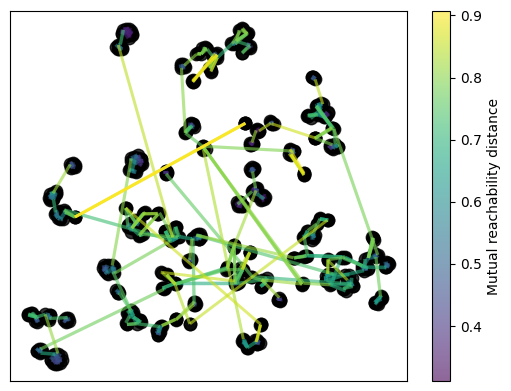

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

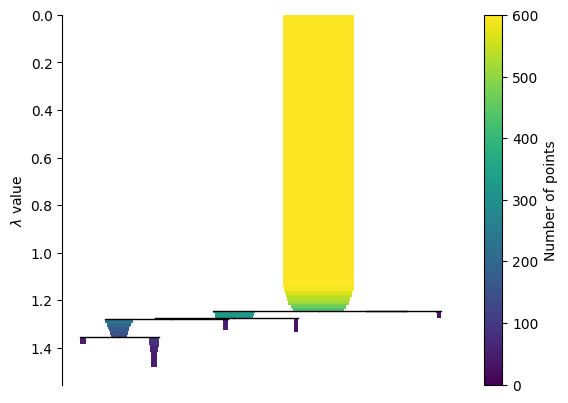

In [ ]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

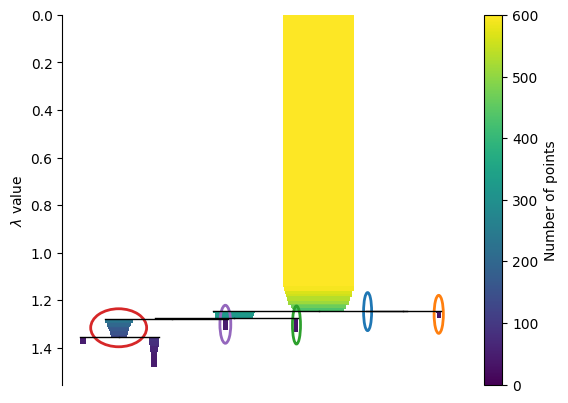

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for DBSCAN
clusters_list = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  if i == -1: #ignore the noise cluster
    continue
  clusters_list.append(cluster_df)
neigh = NearestNeighbors(n_neighbors=2)
for i in range(len(clusters_list)):
  nbrs = neigh.fit(clusters_list[i]['embedding'].tolist())
  distances, indices = nbrs.kneighbors(clusters_list[i]['embedding'].tolist())
  dists = []
  for dist in distances:
    dists.append(np.mean(dist))
  clusters_list[i]['distances'] = dists
  clusters_list[i].sort_values('distances',ascending=True, inplace=True)

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
HDBSCAN_addsub_score= silhouette_score(numpy.array(X), numpy.array(y))
#addsub_cluster_score["HDBSCSN_DBCV_ms2"]= HDBSCAN_addsub_score
HDBSCAN_addsub_score

0.20991215914737815

**OPTICS**

In [ ]:
clust = OPTICS(min_samples=13)
clust.fit(dataset_test_df['embedding'].tolist())

OPTICS(min_samples=13)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Text(0.5, 1.0, 'Reachability Plot')

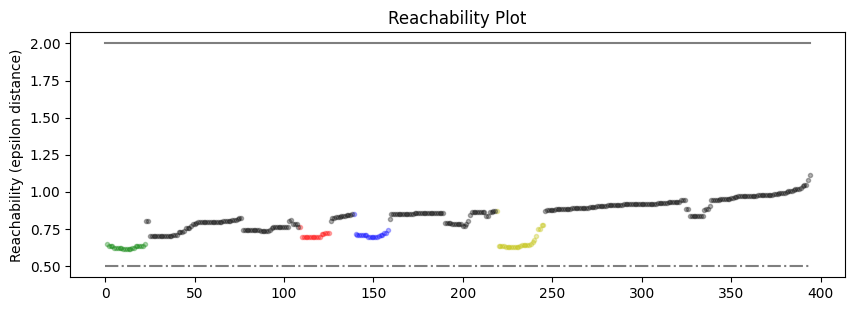

In [ ]:
import matplotlib.gridspec as gridspec
space = np.arange(len(dataset_test_df['embedding'].tolist()))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]
print(labels)

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for DBSCAN
clusters_list = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  if i == -1: #ignore the noise cluster
    continue
  clusters_list.append(cluster_df)
neigh = NearestNeighbors(n_neighbors=10)
for i in range(len(clusters_list)):
  nbrs = neigh.fit(clusters_list[i]['embedding'].tolist())
  distances, indices = nbrs.kneighbors(clusters_list[i]['embedding'].tolist())
  dists = []
  for dist in distances:
    dists.append(np.mean(dist))
  clusters_list[i]['distances'] = dists
  clusters_list[i].sort_values('distances',ascending=True, inplace=True)

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
Optics_addsub_score= silhouette_score(numpy.array(X), numpy.array(y))
#addsub_cluster_score["Optics_DBCV_ms10"]= Optics_addsub_score
Optics_addsub_score

0.0064806948248516995

**MEANSHIFT**

In [ ]:
clustering = MeanShift(bandwidth=0.9).fit(dataset_test_df['embedding'].tolist())
labels = clustering.labels_

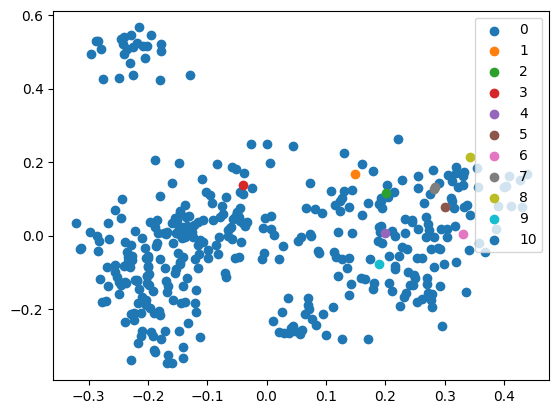

In [ ]:
#Getting unique labels
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

**KMEANS**

In [ ]:
kmeans = KMeans(n_clusters=8).fit(dataset_test_df['embedding'].tolist())
transformed_kmeans = KMeans(n_clusters=8).fit(transformed_emb)
labels = kmeans.labels_
transformed_labels = transformed_kmeans.labels_
centers = kmeans.cluster_centers_
transformed_centers = transformed_kmeans.cluster_centers_

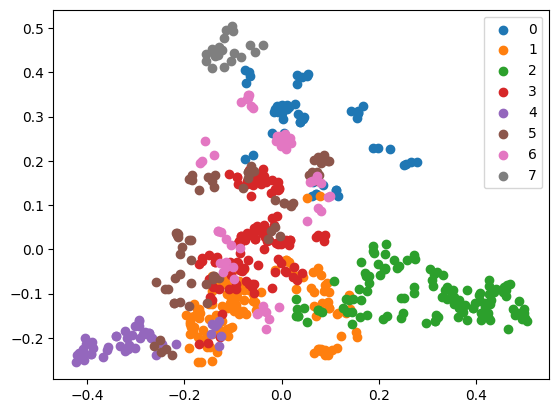

In [ ]:
#Getting unique labels
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

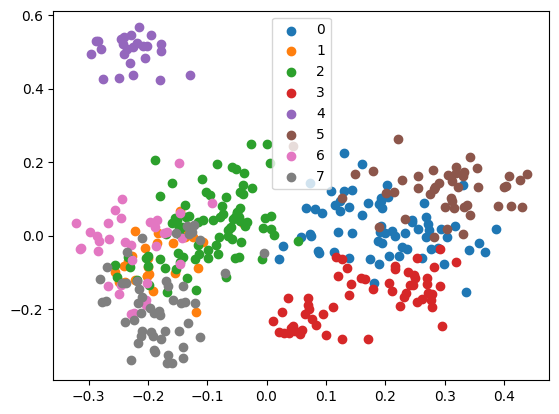

In [ ]:
u_labels = np.unique(transformed_labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for KMEANSE
clusters_list = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  clusters_list.append(cluster_df)
for i in range(len(clusters_list)):
  clusters_list[i].sort_values('embedding',ascending=True, inplace=True,key = lambda p: euclidean_dist(p, centers[i]))

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
kmeans_addsub_score= DBCV(np.array(X), np.array(y))
#addsub_cluster_score["kmeans_silhouette"]= kmeans_addsub_score
kmeans_addsub_score

-0.19293624925421188

**AffinityPropagation**

In [ ]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(damping = 0.5).fit(dataset_test_df['embedding'].tolist())
labels = clustering.labels_
centers = clustering.cluster_centers_

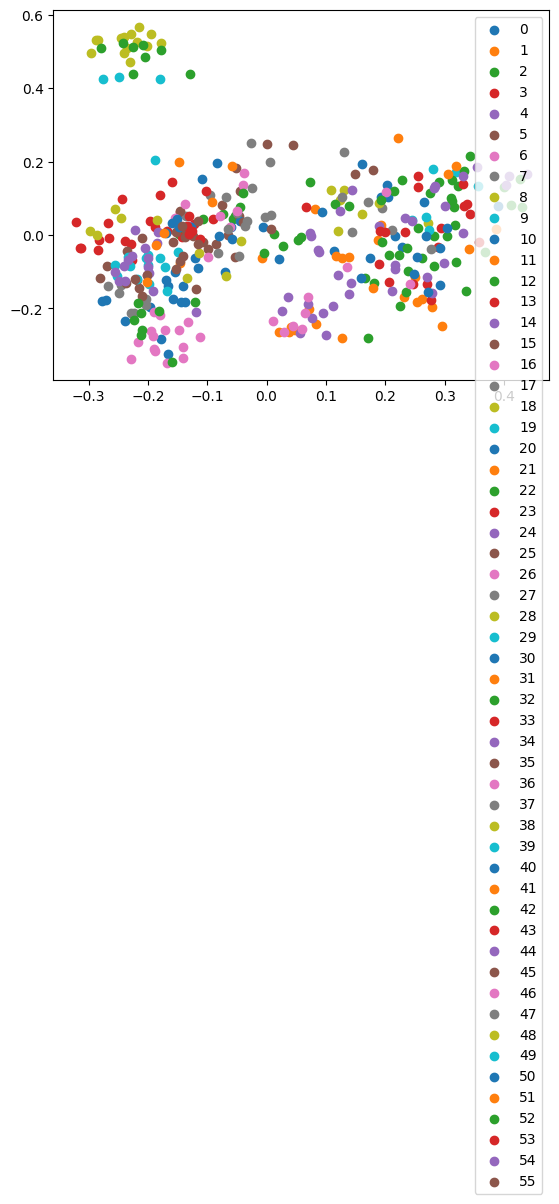

In [ ]:
#Getting unique labels
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#since the results for the transfromed_emb and without transformation are equal we will use original form
#sorting for KMEANSE
clusters_list = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  clusters_list.append(cluster_df)
for i in range(len(clusters_list)):
  clusters_list[i].sort_values('embedding',ascending=True, inplace=True,key = lambda p: euclidean_dist(p, centers[i]))

**Spectral clustering**

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8,assign_labels='kmeans',affinity = 'rbf').fit(dataset_test_df['embedding'].tolist())
labels = clustering.labels_

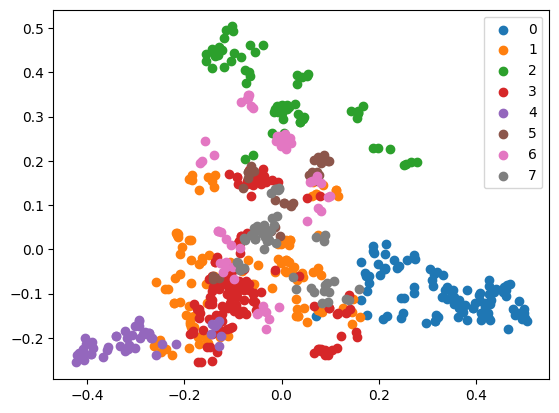

In [ ]:
#Getting unique labels
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(embeddings_in2d[labels == i , 0] , embeddings_in2d[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#distance to the mean value of each cluster is used for ordering them inside the clusters
from statistics import mean
clusters_list = []
centers = []
u_labels = np.unique(labels)
for i in u_labels:
  cluster_df = dataset_test_df[labels == i]
  column_average = [float(sum(col))/len(col) for col in zip(*cluster_df["embedding"].tolist())]
  centers.append(column_average)
  clusters_list.append(cluster_df)
for i in range(len(clusters_list)):
  clusters_list[i].sort_values('embedding',ascending=True, inplace=True,key = lambda p: euclidean_dist(p, centers[i]))

In [ ]:
X,y = linearize_data(u_labels, clusters_list)
Spectral_addsub_score= silhouette_score(X,y)
#addsub_cluster_score["Spectral_DBCV"]= Spectral_addsub_score
Spectral_addsub_score

0.0826313732111712

In [ ]:
multiarith_cluster_score["kmedoid_silhouette"]= 0.0872363728632

In [ ]:
print(addsub_cluster_score)
print(multiarith_cluster_score)

{'DBSCSN_DBCV': -0.39542595727483143, 'Kmedoid_silhouette': 0.00763005529660902, 'award_silhouette': 0.057838919847188315, 'HDBSCSN_DBCV_ms2': 0.1194734811181901, 'Optics_DBCV_ms10': -0.19279597958370567, 'kmeans_silhouette': 0.08330610725925403, 'Spectral_DBCV': -0.20156892899629367}
{'DBSCSN_DBCV': 0.021164824508709573, 'award_silhouette': 0.10038968210278187, 'HDBSCSN_DBCV_ms2': 0.042435056037972985, 'HDBSCSN_DBCV_ms5': 0.0019590218314481447, 'Optics_DBCV_ms10': -0.32144492803579583, 'Optics_DBCV_ms13': -0.28331092589777856, 'kmeans_silhouette': 0.10372659209476552, 'Spectral_DBCV': -0.12375160273106808, 'kmedoid_silhouette': 0.0872363728632}


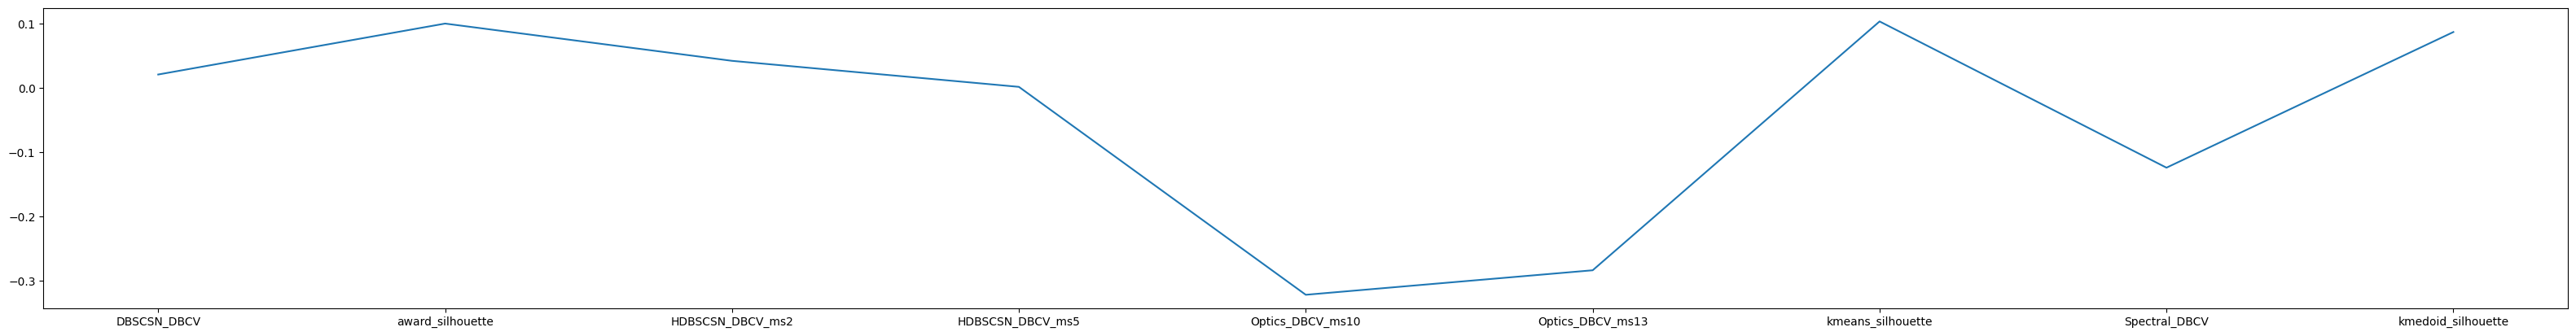

In [ ]:
names = list(multiarith_cluster_score.keys())
values = list(multiarith_cluster_score.values())


f = plt.figure()
f.set_figwidth(40)
plt.plot(names,values)
plt.show()

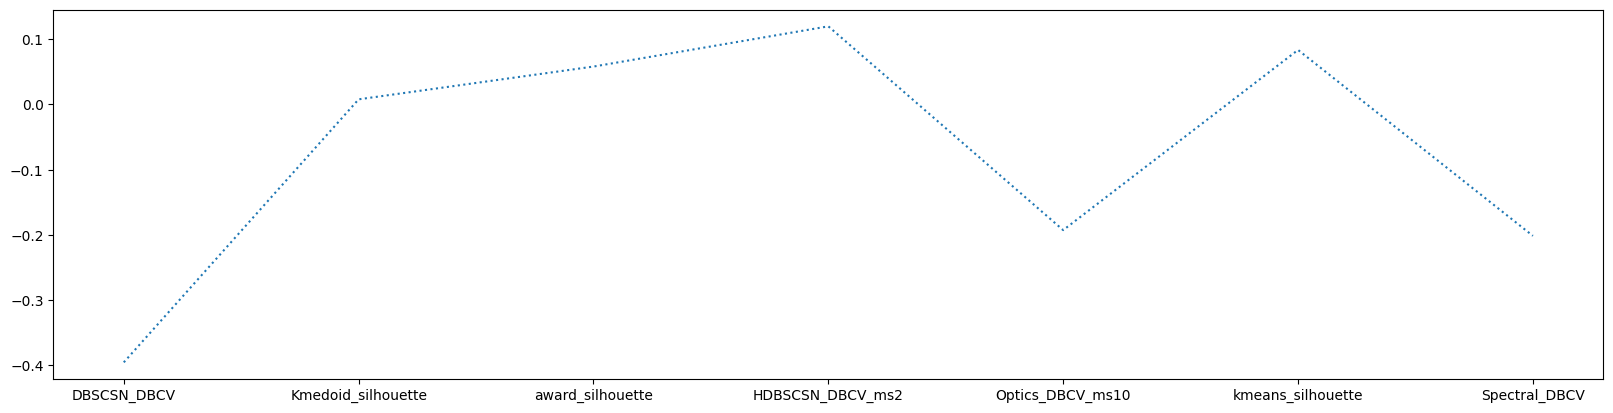

In [ ]:
names = list(addsub_cluster_score.keys())
values = list(addsub_cluster_score.values())


f = plt.figure()
f.set_figwidth(20)
plt.plot(names,values,linestyle = 'dotted')
plt.show()

# **ZERO-SHOT CoT**

In [ ]:
os.environ["OPENAI_API_KEY"] = #key here
openai.api_key = os.getenv("OPENAI_API_KEY")
# all the specifications below are obtained from the zero-shot original paper
def CODEX_ZERO_SHOT_CoT(prompt):
  response = openai.Completion.create(
    model="code-davinci-002",
    prompt=prompt,
    n = 1,
    stream = False,
    echo = False,
    temperature=0.0,
    max_tokens=256,
    top_p = 1.0,
    best_of = 1,
    # logit_bias = logit_bias,
    frequency_penalty=0,
    presence_penalty=0,
    # stop = [";","\n","\n\n",'")'] #4 is the maximum number of sequences we can have
    stop = ["Q:"]
  )
  return response['choices'][0]['text']

In [ ]:
def Zero_shot_prompt_original(test_sample_question):
  prompt = 'Q: ' + test_sample_question + "\nA: Let's think step by step."
  return prompt
print(Zero_shot_prompt_original(dataset_test_df.iloc[0]['question']))

Q:  For Halloween Debby and her sister combined the candy they received. Debby had 32 pieces of candy while her sister had 42. If they ate 35 pieces the first night, how many pieces do they have left? 
A: Let's think step by step.


In [ ]:
def Zero_Shot_CoT(question,label = None):
  print(question)
  reasoning_chain = None
  while reasoning_chain is None:
    try:
      reasoning_chain = CODEX_ZERO_SHOT_CoT(Zero_shot_prompt_original(question)).replace(",",'')
    except:
      time.sleep(3)
      pass
  reasoning_chain = reasoning_chain.replace("\n\n","")
  numbers = re.findall(r'\d+\.?\d*', reasoning_chain)
  if len(numbers) > 0:
    answer = numbers[-1]
  else:
    answer = "No Number has been found in the chain"
  #reasoning_chain += reasoning_chain + "The answer is " + str(answer)+"."
  print(reasoning_chain)
  print(f"True label is = {label}")
  print(f"predicted label is = {answer}")
  return reasoning_chain

In [ ]:
#creating the prompts
df_questions = pd.DataFrame(columns = ['question', 'answer', 'label','embedding','reasoning_chain'])
counter = 0
for cluster in clusters_list:
  print(f"CURRENT CLUSTER IS {counter}")
  for index, row in cluster.iterrows():
    reasoning_chain = Zero_Shot_CoT(row['question'],row['label'])
    #the heuristic to rule out the wrong demonstrations
    # steps = reasoning_chain.split("This question requires ")[1].split(" ")[0]
    steps = len(nltk.sent_tokenize(reasoning_chain))
    if len(nltk.word_tokenize(row['question'])) <= 60 and steps <= 6:
      df_questions = df_questions.append({'question' : row['question'], 'answer' : row['answer'],'label' : row['label'],
                                          'embedding' : row['embedding'], 'reasoning_chain' : reasoning_chain},ignore_index = True)
      break
  counter += 1
print(df_questions)

CURRENT CLUSTER IS 0
 Roger is at the library helping put away books. There are 14 book to put away total but a librarian takes 2 of them and leaves Roger with the rest. If he can fit 3 books on a shelf, how many shelves will he need? 
 Roger has 14 books to put away. 
A librarian takes 2 of them. 
Roger is left with 12 books. 
Roger can fit 3 books on a shelf. 
Roger will need 4 shelves. 
True label is = 4.0
predicted label is = 4
CURRENT CLUSTER IS 1
 The school cafeteria had 12 apples. If they used 8 to make lunch for the students and then bought 19 more, how many apples would they have? 
 The school cafeteria had 12 apples. 
They used 8 to make lunch for the students. 
They bought 19 more. So the school cafeteria had 12 apples. They used 8 to make lunch for the students. They bought 19 more. So they had 12 + 19 - 8 = 23 apples. 

True label is = 23.0
predicted label is = 23
 A store had 31 oranges in a bin. If they threw away 9 of the old ones and put 38 new ones in the bin how man

# **FEW-SHOT CoT**

In [ ]:
# all the specifications below are obtained from the zero-shot original paper
def CODEX_FEW_SHOT_CoT(prompt):
  response = openai.Completion.create(
    model="code-davinci-002",
    prompt=prompt,
    n = 1,
    stream = False,
    echo = False,
    temperature=0.0,
    max_tokens=256,
    top_p = 1.0,
    best_of = 1,
    # logit_bias = logit_bias,
    frequency_penalty=0.0,
    presence_penalty=0.0,
    # stop = [";","\n","\n\n",'")'] #4 is the maximum number of sequences we can have
    stop = ["Q:"]
  )
  return response['choices'][0]['text']

In [ ]:
def Few_shot_prompt(test_sample_question,df_questions):
  demonstrations = ""
  for index, row in df_questions.iterrows():
    demonstrations += "Q: " + row['question'] + "\n"
    demonstrations += "A: Let's think step by step." + row['reasoning_chain'] + "\n\n"
  prompt = demonstrations + 'Q: ' + test_sample_question + "\nA: Let's think step by step."
  return prompt
print(Few_shot_prompt(dataset_test_df.iloc[0]['question'],df_questions))

Q:  Roger is at the library helping put away books. There are 14 book to put away total but a librarian takes 2 of them and leaves Roger with the rest. If he can fit 3 books on a shelf, how many shelves will he need? 
A: Let's think step by step. Roger has 14 books to put away. 
A librarian takes 2 of them. 
Roger is left with 12 books. 
Roger can fit 3 books on a shelf. 
Roger will need 4 shelves. 

Q:  A store had 31 oranges in a bin. If they threw away 9 of the old ones and put 38 new ones in the bin how many would be in the bin? 
A: Let's think step by step. There were 31 oranges in the bin. 
They threw away 9 of the old ones. 
They put 38 new ones in the bin. So 31 - 9 + 38 = 60 oranges in the bin. 


Q:  There are 65 students trying out for the school's trivia teams. If 17 of them didn't get picked for the team and the rest were put into 8 groups, how many students would be in each group? 
A: Let's think step by step. First we need to find out how many students were picked for th

In [ ]:
accuracy = 0

In [ ]:
dataset_size = dataset_test_df.shape[0]
# dataset_size = 100
for index, row in dataset_test_df.iterrows():
  # if index < 327: continue
  print(f"index is {index}")
  print(row['question'])
  print(f"True label is = {row['label']}")
  reasoning_chain = None
  while reasoning_chain is None:
    try:
      reasoning_chain = CODEX_FEW_SHOT_CoT(Few_shot_prompt(row['question'],df_questions)).replace(",",'')
    except:
      time.sleep(3)
      pass
  reasoning_chain = reasoning_chain.replace("\n","")
  answer = re.findall(r'\d+\.?\d*', reasoning_chain)[-1]
  if answer[-1] == ".":
    answer = answer[:-1]
  if float(str(row['label']).replace(",","")) == float(answer) :
    accuracy += 1
  print(f"predicted label is = {answer}")
  print(f"intermediate acc = {accuracy/(index+1)}")
print(f"Final accuracy {accuracy/dataset_size}")

index is 0
 For Halloween Debby and her sister combined the candy they received. Debby had 32 pieces of candy while her sister had 42. If they ate 35 pieces the first night, how many pieces do they have left? 
True label is = 39.0
predicted label is = 39
intermediate acc = 1.0
index is 1
 A pet store had 13 siamese cats and 5 house cats. During a sale they sold 10 cats. How many cats do they have left? 
True label is = 8.0
predicted label is = 8
intermediate acc = 1.0
index is 2
 Luke was trying to expand his game collection. He bought 2 games from a friend and bought 2 more at a garage sale. If 2 of the games didn't work, how many good games did he end up with? 
True label is = 2.0
predicted label is = 2
intermediate acc = 1.0
index is 3
 The school cafeteria ordered 42 red apples and 7 green apples for students lunches. But, if only 9 students wanted fruit, how many extra did the cafeteria end up with? 
True label is = 40.0
predicted label is = 40
intermediate acc = 1.0
index is 4
 L